<a href="https://colab.research.google.com/github/Agil0509/Deep-Learning/blob/main/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

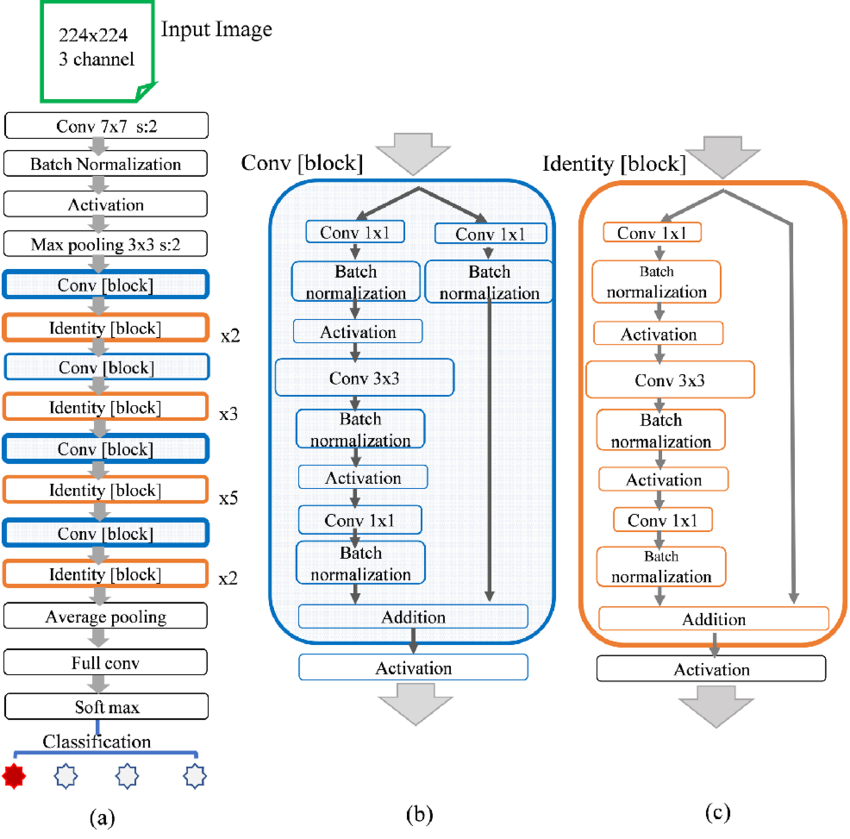

In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,BatchNormalization,Activation,GlobalMaxPool2D,Add,GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [38]:
def conv_layer(x, filters, kernel_size, strides, padding = 'same'):
    x = Conv2D(filters = filters, kernel_size = kernel_size,strides = strides, padding = padding)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

In [39]:
def conv_block(x,filters,strides):
    shortcut = x
    x = conv_layer(x, filters = filters, kernel_size = (1,1), strides = strides)
    x = conv_layer(x,filters = filters, kernel_size = (3,3), strides = 1)
    x = Conv2D(filters = filters * 4, kernel_size = (1,1),strides = 1)(x)
    X = BatchNormalization()(x)
    shortcut = Conv2D(filters = 4*filters, kernel_size=(1,1),strides = strides)(shortcut)
    shortcut = BatchNormalization()(shortcut)
    x = Add()([x,shortcut])
    x = Activation('relu')(x)
    return x

In [40]:
def identity_block(x,filters):
    shortcut = x
    x = conv_layer(x, filters = filters, kernel_size = (1,1), strides = 1)
    x = conv_layer(x, filters = filters, kernel_size = (3,3), strides = 1)
    x = Conv2D(filters = 4*filters, kernel_size = (1,1), strides = 1)(x)
    x = BatchNormalization()(x)
    x = Add()([x,shortcut])
    x = Activation('relu')(x)
    return x

In [41]:
def ResNet50(input_shape = (224,224,3),num_classes = 1000):
    inputs = Input(shape = input_shape)

    # initial conv layer
    x = conv_layer(inputs, filters = 64, kernel_size = (7,7), strides = 2)
    x = MaxPooling2D(pool_size = (3,3), strides = 2, padding = 'same')(x)

    # Block 1
    x = conv_block(x,filters = 64, strides = 1)
    x = identity_block(x, filters = 64)
    x = identity_block(x, filters = 64)

    # Block 2
    x = conv_block(x, filters = 128, strides = 2)
    x = identity_block(x, filters = 128)
    x = identity_block(x, filters = 128)
    x = identity_block(x, filters = 128)

    # Block 3
    x = conv_block(x, filters = 256, strides = 2)
    x = identity_block(x, filters = 256)
    x = identity_block(x, filters = 256)
    x = identity_block(x, filters = 256)
    x = identity_block(x, filters = 256)
    x = identity_block(x, filters = 256)

    # Block 4
    x = conv_block(x, filters = 512, strides = 2)
    x = identity_block(x, filters = 512)
    x = identity_block(x, filters = 512)

    # Global average poooling and Dense layer
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(units = num_classes, activation = 'softmax')(x)

    model = Model(inputs = inputs, outputs = outputs)
    return model

In [42]:
model = ResNet50(input_shape=(224,224,3),num_classes = 1000)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_132 (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_132   │ (None, 112, 112, 64)   │            256 │ conv2d_132[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_114            │ (None, 112, 112, 64)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 56, 56, 64)     │              0 │ activation_114[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_133 (Conv2D)       │ (None, 56, 56, 64)     │          4,160 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_133   │ (None, 56, 56, 64)     │            256 │ conv2d_133[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_115            │ (None, 56, 56, 64)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_134 (Conv2D)       │ (None, 56, 56, 64)     │         36,928 │ activation_115[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_134   │ (None, 56, 56, 64)     │            256 │ conv2d_134[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_116            │ (None, 56, 56, 64)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_136 (Conv2D)       │ (None, 56, 56, 256)    │         16,640 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_135 (Conv2D)       │ (None, 56, 56, 256)    │         16,640 │ activation_116[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_136   │ (None, 56, 56, 256)    │          1,024 │ conv2d_136[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_32 (Add)              │ (None, 56, 56, 256)    │              0 │ conv2d_135[0][0],      │
│                      

 Total params: 25,621,352 (97.74 MB)

 Trainable params: 25,575,912 (97.56 MB)

 Non-trainable params: 45,440 (177.50 KB)

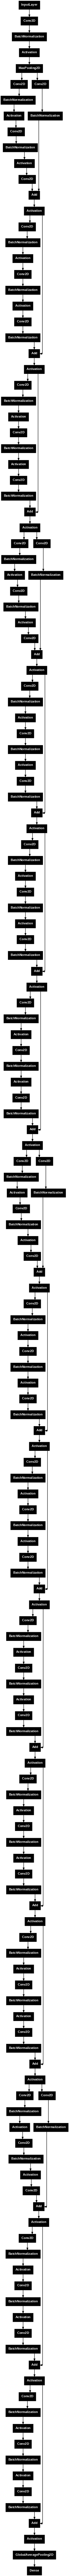

In [46]:
tf.keras.utils.plot_model(model, dpi = 50)